In [1]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import sounddevice as sd


In [2]:
# Lê o arquivo de áudio
sinal, fs = sf.read('Audio.wav')


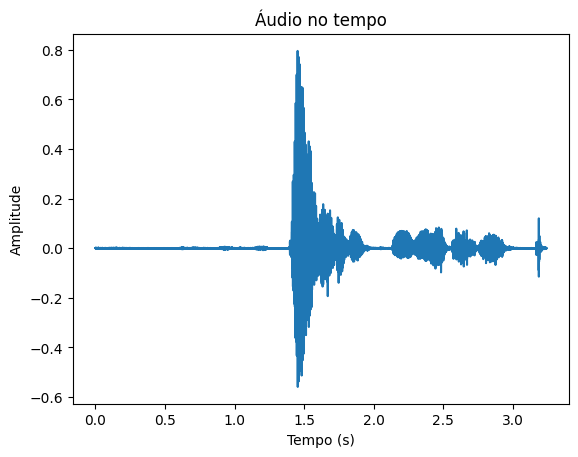

In [3]:
t = np.linspace(0, len(sinal)/fs, len(sinal))
plt.plot(t, sinal)
plt.title("Áudio no tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

In [4]:
# FFT
X = fft(sinal)
frequencias = fftfreq(len(X), 1/fs)

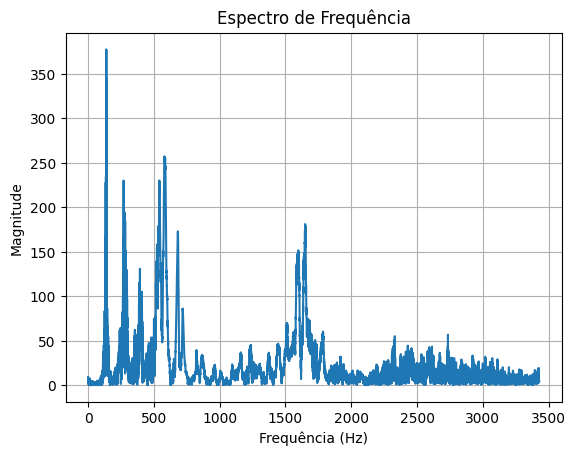

In [5]:
# Mostra espectro
plt.plot(frequencias[:len(X)//14], np.abs(X[:len(X)//14]))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [6]:
# Função para aplicar filtros no domínio da frequência
def filtro_fft(X, f, fs, tipo, fc1, fc2=None):
    X_filtrado = X.copy()
    if tipo == 'low':
        X_filtrado[np.abs(f) > fc1] = 0
    elif tipo == 'high':
        X_filtrado[np.abs(f) < fc1] = 0
    elif tipo == 'band':
        X_filtrado[(np.abs(f) < fc1) | (np.abs(f) > fc2)] = 0
    else:
        raise ValueError("Tipo inválido")
    return X_filtrado

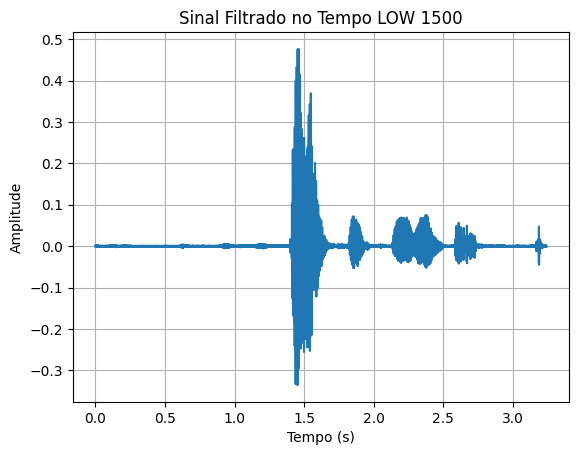

In [7]:
X_filtrado = filtro_fft(X, frequencias, fs, 'low', 1500)
sinal_filtrado = np.real(ifft(X_filtrado))

#Mostra sinal filtrado no tempo
t = np.linspace(0, len(sinal_filtrado)/fs, len(sinal_filtrado))
plt.plot(t, sinal_filtrado)
plt.title("Sinal Filtrado no Tempo LOW 1500")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [8]:
X_novo = fft(sinal_filtrado)
frequencias_novo = fftfreq(len(X_novo), 1/fs)

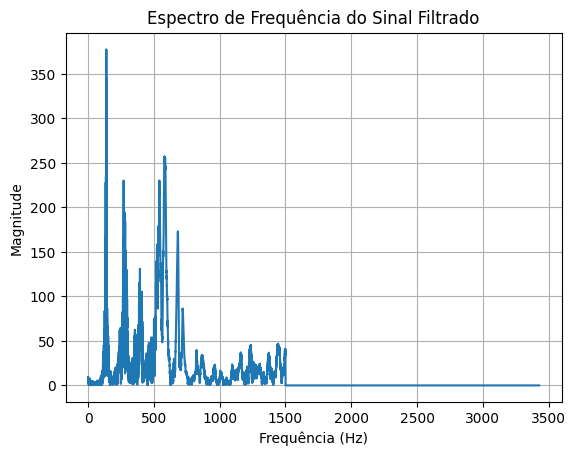

In [9]:
#Plota espectro de frequência do sinal filtrado
plt.plot(frequencias_novo[:len(X_novo)//14], np.abs(X_novo[:len(X_novo)//14]))
plt.title("Espectro de Frequência do Sinal Filtrado")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [10]:
# Reproduz áudio filtrado
sd.play(sinal_filtrado, fs)